## Памятка для понимания значений и интерпретации результатов

### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация вещества, необходимая для **подавления** биологического процесса (например, репликации вируса, активности фермента) на **50%** по сравнению с контролем.  
- **Применение:**  
  - В противовирусных исследованиях — показывает, насколько эффективно вещество блокирует вирус.  
  - Чем **меньше IC₅₀**, тем выше эффективность соединения.  

### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация вещества, вызывающая **гибель 50% клеток** в эксперименте (токсичность).  
- **Применение:**  
  - Отражает **цитотоксичность** вещества для здоровых клеток.  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  

### **3. SI (Selectivity Index — Индекс Селективности)**  
- **Формула:**  
  $ SI = \frac{CC_{50}}{IC_{50}}   $
- **Смысл:** Показывает, насколько вещество **избирательно** действует на мишень (например, вирус), а не на клетки хозяина.  
  - **SI > 10** — считается приемлемым для потенциальных лекарств.  
  - **SI > 100** — высокая селективность, минимальная токсичность.  

### **Пример интерпретации:**  
Если у препарата:  
- **IC₅₀ = 1 μM** (хорошо подавляет вирус),  
- **CC₅₀ = 100 μM** (низкая токсичность),  
то **SI = 100** — отличный кандидат для дальнейших исследований.  

Эти параметры критически важны при скрининге новых лекарств, особенно противовирусных (например, против ВИЧ, SARS-CoV-2).

In [6]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

In [7]:
df = pd.read_excel('data/Данные_для_курсовои_Классическое_МО.xlsx')
# Удаляем нумерацию что бы она нам не мешалась
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
# Проверка на наличие пропущенных значений
missing_df = pd.DataFrame({
    "Количество пропусков": df.isnull().sum(),
    "Доля пропусков (%)": (df.isnull().mean() * 100).round(2)
})

missing_df = missing_df[missing_df["Количество пропусков"] > 0]

print("Статистика пропусков:")
missing_df

Статистика пропусков:


,Количество пропусков,Доля пропусков (%)
MaxPartialCharge,3,0.3
MinPartialCharge,3,0.3
MaxAbsPartialCharge,3,0.3
MinAbsPartialCharge,3,0.3
BCUT2D_MWHI,3,0.3
BCUT2D_MWLOW,3,0.3
BCUT2D_CHGHI,3,0.3
BCUT2D_CHGLO,3,0.3
BCUT2D_LOGPHI,3,0.3
BCUT2D_LOGPLOW,3,0.3


In [8]:
df.fillna(0, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 1. Заполнение пропусков медианой (исправленная версия)
# Создаем копию DataFrame для безопасной модификации
df_clean = df.copy()
df_clean.fillna(df_clean.median(), inplace=True)

# 2. Обнаружение и удаление выбросов с помощью IsolationForest
# Выбираем только числовые признаки для анализа выбросов
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Создаем и обучаем модель IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df_clean[numeric_cols])

# Создаем новый DataFrame без выбросов
df_no_outliers = df_clean[outliers == 1].copy()

# 3. Разделение на признаки и целевую переменную
X = df_no_outliers.drop(["IC50, mM", "CC50, mM", "SI"], axis=1)
y = df_no_outliers["IC50, mM"]  # Как пример

# 4. Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Вывод информации
print(f"Исходный размер данных: {len(df)} записей")
print(f"После очистки: {len(df_no_outliers)} записей")
print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Исходный размер данных: 1001 записей
После очистки: 951 записей
Обучающая выборка: 760 samples
Тестовая выборка: 191 samples


In [ ]:
# Разделение на признаки (X) и целевые переменные (y)
X = df.drop(columns=["IC50, mM", "CC50, mM", "SI"])  # Все фичи, кроме целевых
y_ic50 = df["IC50, mM"]
y_cc50 = df["CC50, mM"]
y_si = df["SI"]

# Бинарные классификации (медианные пороги)
median_ic50 = y_ic50.median()
median_cc50 = y_cc50.median()
median_si = y_si.median()

y_ic50_class = (y_ic50 > median_ic50).astype(int)
y_cc50_class = (y_cc50 > median_cc50).astype(int)
y_si_class = (y_si > median_si).astype(int)
y_si_class_8 = (y_si > 8).astype(int)  # Порог SI=8

# Разделение на train/test (для всех задач)
_, _, y_ic50_class_train, y_ic50_class_test = train_test_split(X, y_ic50_class, test_size=0.2, random_state=42)
_, _, y_cc50_class_train, y_cc50_class_test = train_test_split(X, y_cc50_class, test_size=0.2, random_state=42)
_, _, y_si_class_train, y_si_class_test = train_test_split(X, y_si_class, test_size=0.2, random_state=42)
_, _, y_si_class_8_train, y_si_class_8_test = train_test_split(X, y_si_class_8, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cuml.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 


def compare_regression_models(X, y, test_size=0.2, random_state=42, n_iter=10):
    """
    Сравнивает производительность различных моделей регрессии
    
    Параметры:
    -----------
    X : array-like
        Матрица признаков
    y : array-like
        Вектор целевой переменной
    test_size : float
        Доля тестовой выборки (по умолчанию 0.2)
    random_state : int
        Seed для воспроизводимости (по умолчанию 42)
    
    Возвращает:
    -----------
    pd.DataFrame
        Таблица с результатами оценки моделей
    """
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    

    # Удаление аномалий (только из обучающей выборки!)
    iso_forest = IsolationForest(
        contamination=0.05,  # 5% данных считаем аномалиями
        random_state=random_state,
        n_jobs=-1
    )
    outliers_mask = iso_forest.fit_predict(X_train) == 1  # 1 = нормальные точки, -1 = аномалии
    X_train = X_train[outliers_mask]
    y_train = y_train[outliers_mask]
    
    print(f"Удалено {len(outliers_mask) - sum(outliers_mask)} аномалий ({100*(1 - sum(outliers_mask)/len(outliers_mask)):.1f}% данных)")
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Модели
    models = {
        "XGBoost": {
            "model": XGBRegressor(random_state=random_state, device="cuda"),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        # Нормально не работает с gpu попозже разберусь
        # "LightGBM": {
        #     "model": LGBMRegressor(
        #         random_state=random_state, 
        #         device="gpu",  # Включить GPU
        #         gpu_platform_id=0,  # ID платформы (обычно 0)
        #         gpu_device_id=0     # ID устройства (обычно 0)
        #     ),
        #     "params": {
        #         'n_estimators': [100, 200, 300],
        #         'max_depth': [3, 5, 7, -1],
        #         'learning_rate': [0.01, 0.1, 0.2],
        #         'num_leaves': [31, 50, 100],
        #         'subsample': [0.8, 0.9, 1.0]
        #     }
        # },
        "Random Forest": {
            "model": RandomForestRegressor(random_state=random_state),
            "params": {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        },
        "Neural Network": {
            "model": MLPRegressor(random_state=random_state, early_stopping=True),
            "params": {
                'hidden_layer_sizes': [(64, 32), (128, 64), (64,)],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'batch_size': [32, 64, 128]
            }
        }
    }
    
    results = []
    
    # Обучение и оценка
    for name, config in models.items():
        start_time = time.time()
        
        search = RandomizedSearchCV(
            estimator=config["model"],
            param_distributions=config["params"],
            n_iter=n_iter,
            cv=3,
            scoring='neg_mean_squared_error',
            random_state=random_state,
            n_jobs=-1
        )
        
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        
        y_pred = best_model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results.append({
            'Model': name,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae,
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        print({
            'Model': name,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae,
            'Best Params': search.best_params_,
            'Time (sec)': round(time.time() - start_time, 2)
        })
        
    results_df = pd.DataFrame(results).set_index('Model')
    
    # Визуализация на одном графике
    plt.figure(figsize=(12, 8))
    
    # Подготовка данных для графика
    metrics = ['RMSE', 'R2', 'MAE']
    colors = ['skyblue', 'lightgreen', 'salmon']
    titles = [
        'RMSE (чем меньше, тем лучше)',
        'R² (чем ближе к 1, тем лучше)',
        'MAE (чем меньше, тем лучше)'
    ]
    
    # Нормализация для совмещения на одном графике
    normalized_df = results_df.copy()
    for metric in metrics:
        normalized_df[metric] = (results_df[metric] - results_df[metric].min()) / \
                               (results_df[metric].max() - results_df[metric].min())
    
    # Построение группированного bar plot
    bar_width = 0.25
    index = np.arange(len(results_df))
    
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, results_df[metric], bar_width, 
                color=colors[i], label=titles[i])
    
    plt.xlabel('Модели')
    plt.ylabel('Значения метрик')
    plt.title('Сравнение моделей регрессии по различным метрикам', pad=20)
    plt.xticks(index + bar_width, results_df.index)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Добавление значений на столбцы
    for i, model in enumerate(results_df.index):
        for j, metric in enumerate(metrics):
            plt.text(i + j*bar_width, results_df.loc[model, metric] + 0.05 * results_df.loc[model, metric],
                    f'{results_df.loc[model, metric]:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

Удалено 40 аномалий (5.0% данных)


/home/revel/.venv/lib/python3.12/site-packages/cuml/internals/api_decorators.py:317: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/home/revel/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [21:13:16] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/revel/.venv/lib/python3.12/site-packages/xgboost/

{'Model': 'XGBoost', 'RMSE': 453.6970170345226, 'R2': 0.38289524210601866, 'MAE': 239.59144403129596, 'Best Params': {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}, 'Time (sec)': 36.1}


AttributeError: 'NoneType' object has no attribute 'getHandle'
Exception ignored in: 'cuml.legacy.fil.fil.ForestInference_impl.__dealloc__'
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py", line 109, in _get_memory_usage
    gc.collect()
AttributeError: 'NoneType' object has no attribute 'getHandle'
AttributeError: 'NoneType' object has no attribute 'getHandle'
Exception ignored in: 'cuml.legacy.fil.fil.ForestInference_impl.__dealloc__'
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py", line 109, in _get_memory_usage
    gc.collect()
AttributeError: 'NoneType' object has no attribute 'getHandle'
AttributeError: 'NoneType' object has no attribute 'getHandle'
Exception ignored in: 'cuml.legacy.fil.fil.ForestInference_impl.__dealloc__'
Traceback (most recent call last):
  File "/home/revel/.venv/lib/python3.12/site-packages/

{'Model': 'Random Forest', 'RMSE': 436.11637588125706, 'R2': 0.4297939302469558, 'MAE': 232.8684192239013, 'Best Params': {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}, 'Time (sec)': 37.04}


/home/revel/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Model': 'Neural Network', 'RMSE': 444.35585600050246, 'R2': 0.40804476859885574, 'MAE': 226.32868484640161, 'Best Params': {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128, 64), 'batch_size': 32, 'alpha': 0.001}, 'Time (sec)': 13.93}


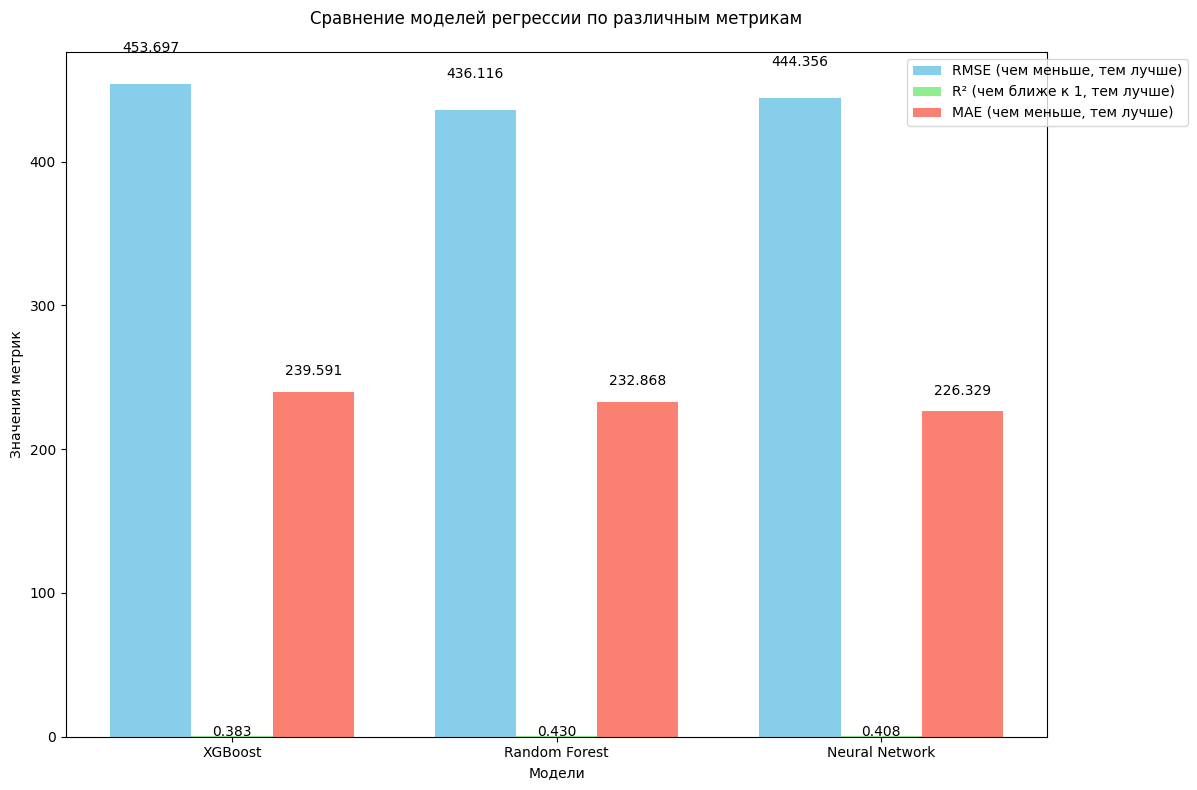

,RMSE,R2,MAE,Best Params,Time (sec)
Model,,,,,
XGBoost,453.697017,0.382895,239.591444,"{'subsample': 0.9, 'n_estimators': 200, 'max_d...",36.10
Random Forest,436.116376,0.429794,232.868419,"{'n_estimators': 100, 'min_samples_split': 10,...",37.04
Neural Network,444.355856,0.408045,226.328685,"{'learning_rate_init': 0.001, 'hidden_layer_si...",13.93


In [12]:
results = compare_regression_models(X, y_ic50)
results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17926
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 169
[LightGBM] [Info] Start training from score 592.558563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


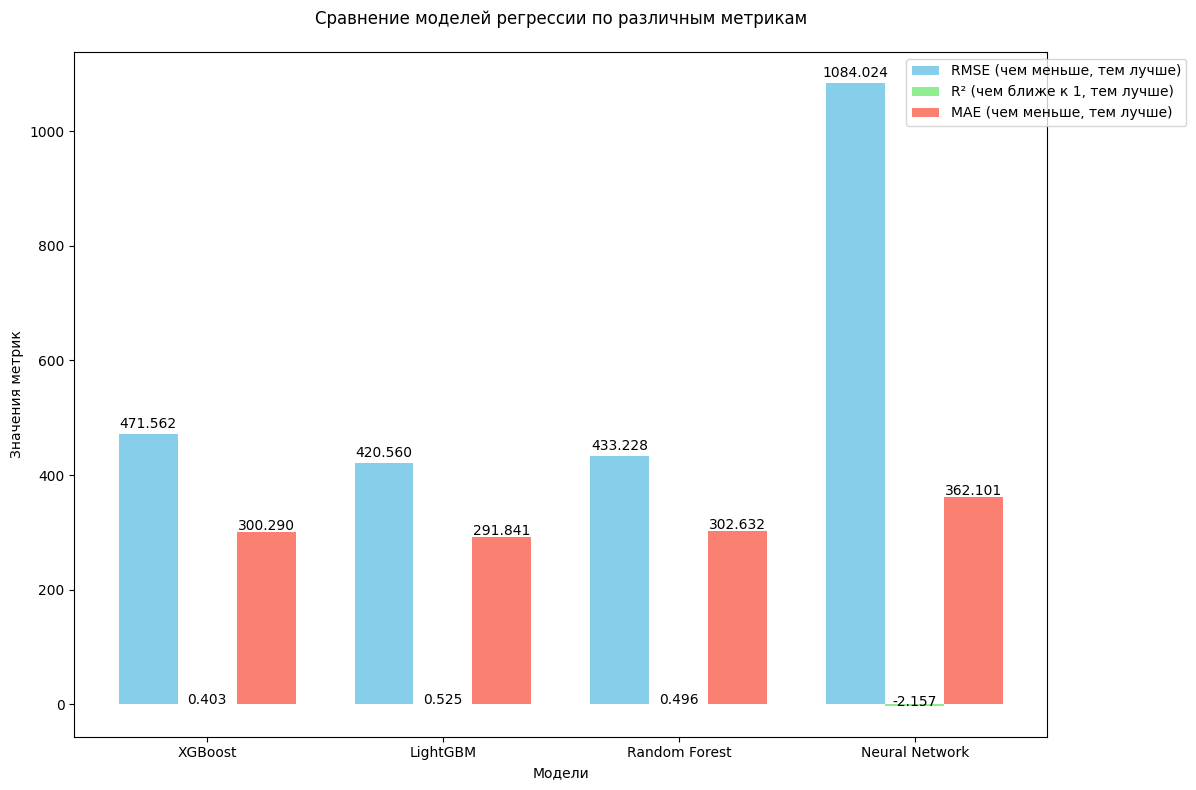

,RMSE,R2,MAE
Model,,,
XGBoost,471.561846,0.402606,300.289837
LightGBM,420.559940,0.524841,291.841072
Random Forest,433.228134,0.495784,302.632180
Neural Network,1084.023789,-2.156902,362.101081


In [9]:
results = compare_regression_models(X, y_cc50)
results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17926
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 169
[LightGBM] [Info] Start training from score 79.185183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


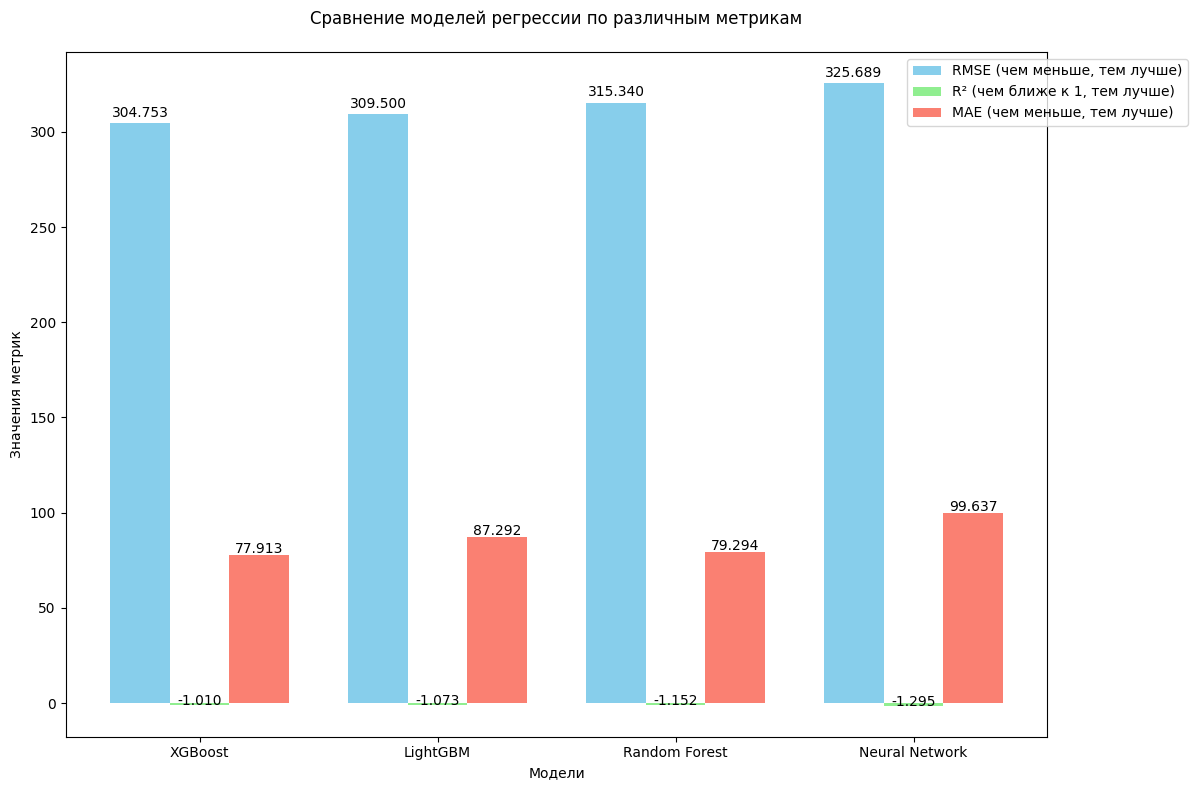

,RMSE,R2,MAE
Model,,,
XGBoost,304.752539,-1.009645,77.913402
LightGBM,309.499512,-1.072739,87.292401
Random Forest,315.339715,-1.151702,79.294414
Neural Network,325.689313,-1.295259,99.637330


In [10]:
results = compare_regression_models(X, y_si)
results

Лучшие выбрать LightGBM. Хотя Random Forest немного лучше по RMSE и R², LightGBM выигрывает по MAE (меньше ошибка), работает быстрее, экономит память и лучше масштабируется. Разница в RMSE/R² менее 1%, поэтому LightGBM предпочтительнее.  

Далее попробую настроить гиперпараметры LightGBM, чтобы улучшить RMSE и R², сохранив преимущество в MAE.

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Модели
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Обучение и оценка
for name, model in models.items():
    model.fit(X_train_scaled, y_si_class_8_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_si_class_8_test, y_pred)
    f1 = f1_score(y_si_class_8_test, y_pred)
    print(f"{name}: Accuracy={acc:.3f}, F1={f1:.3f}")

XGBoost: Accuracy=0.711, F1=0.532
[LightGBM] [Info] Number of positive: 286, number of negative: 514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17995
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357500 -> initscore=-0.586231
[LightGBM] [Info] Start training from score -0.586231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Random Forest: Accuracy=0.692, F1=0.475
Logistic Regression: Accuracy=0.687, F1=0.496


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [3, 5]}
grid = GridSearchCV(LGBMRegressor(), params, cv=5)
grid.fit(X_train_scaled, y_ic50_train)
print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('xgb', XGBRegressor()), ('lgbm', LGBMRegressor())]
stack = StackingRegressor(estimators, final_estimator=RandomForestRegressor())
stack.fit(X_train_scaled, y_ic50_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17995
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 168
[LightGBM] [Info] Start training from score 204.234616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15037
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 166
[LightGBM] [Info] Start training from score 203.598801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('lgbm', LGBMRegressor())],
                  final_estimator=RandomForestRegressor())

/home/revel/.venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


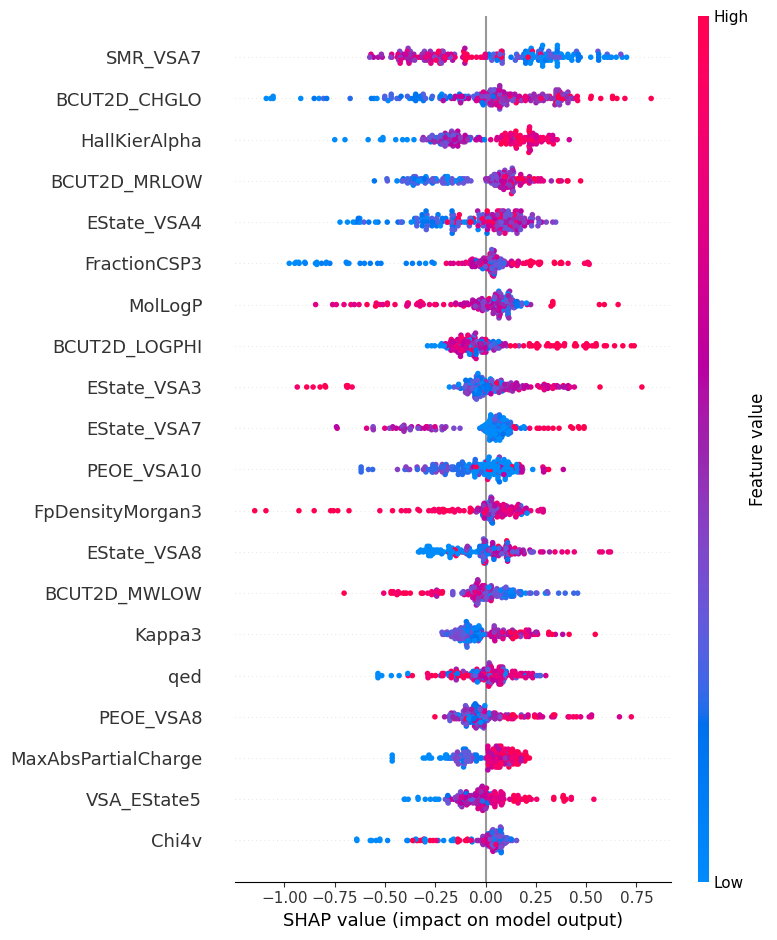

In [ ]:
import shap
explainer = shap.TreeExplainer(models["LightGBM"])
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

data = [
    {'Model': 'XGBoost', 'RMSE': 453.6970170345226, 'R2': 0.38289524210601866, 
     'MAE': 239.59144403129596, 'Time (sec)': 36.1, 'Experiment': 'CC50'},
    {'Model': 'Random Forest', 'RMSE': 436.11637588125706, 'R2': 0.4297939302469558, 
     'MAE': 232.8684192239013, 'Time (sec)': 37.04, 'Experiment': 'CC50'},
    {'Model': 'Neural Network', 'RMSE': 444.35585600050246, 'R2': 0.40804476859885574, 
     'MAE': 226.32868484640161, 'Time (sec)': 13.93, 'Experiment': 'CC50'},
    
    {'Model': 'XGBoost', 'RMSE': 464.625965390857, 'R2': 0.5836103432048649, 
     'MAE': 293.9290645038305, 'Time (sec)': 38.5, 'Experiment': 'IC50'},
    {'Model': 'Random Forest', 'RMSE': 451.4122933858691, 'R2': 0.6069572911500704, 
     'MAE': 278.1825514417777, 'Time (sec)': 36.4, 'Experiment': 'IC50'},
    {'Model': 'Neural Network', 'RMSE': 500.8051765036426, 'R2': 0.5162392838021651, 
     'MAE': 315.15490719920564, 'Time (sec)': 16.36, 'Experiment': 'IC50'},
    
    {'Model': 'XGBoost', 'RMSE': 1354.477735415758, 'R2': 0.0866588120110402, 
     'MAE': 185.27528527951281, 'Time (sec)': 48.16, 'Experiment': 'SI'},
    {'Model': 'Random Forest', 'RMSE': 1357.3601204029133, 'R2': 0.08276741977672442, 
     'MAE': 189.53613747755819, 'Time (sec)': 42.04, 'Experiment': 'SI'},
    {'Model': 'Neural Network', 'RMSE': 1421.3971370178479, 'R2': -0.005819785806299382, 
     'MAE': 184.91516004662247, 'Time (sec)': 5.56, 'Experiment': 'SI'}
]

df = pd.DataFrame(data)

# Создаем комплексную панель графиков
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "polar"}],
           [{"type": "xy"}, {"type": "xy"}]],
    subplot_titles=("Сравнение метрик по экспериментам", 
                   "Радиальная диаграмма (По всем экспериментам)",
                   "Время vs Точность (R²)",
                   "Сравнение времени выполнения")
)

# 1. Барплот метрик
metrics = ['RMSE', 'MAE', 'R2']
for i, metric in enumerate(metrics):
    for exp in df['Experiment'].unique():
        exp_data = df[df['Experiment'] == exp]
        fig.add_trace(
            go.Bar(
                x=exp_data['Model'],
                y=exp_data[metric],
                name=f"{metric} ({exp})",
                legendgroup=metric,
                marker_color=px.colors.qualitative.Plotly[i],
                showlegend=True
            ),
            row=1, col=1
        )

# 2. Радиальная диаграмма с усредненными значениями по всем экспериментам
avg_metrics = df.groupby('Model').mean(numeric_only=True).reset_index()

for model in avg_metrics['Model'].unique():
    model_data = avg_metrics[avg_metrics['Model'] == model].iloc[0]
    fig.add_trace(
        go.Scatterpolar(
            r=[model_data['RMSE'], model_data['MAE'], model_data['R2'], model_data['Time (sec)']],
            theta=['RMSE', 'MAE', 'R²', 'Time'],
            fill='toself',
            name=model,
            subplot="polar"
        ),
        row=1, col=2
    )


# 3. Scatter plot время vs точность
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    fig.add_trace(
        go.Scatter(
            x=model_data['Time (sec)'],
            y=model_data['R2'],
            mode='markers',
            marker_size=model_data['MAE']/10,
            name=model,
            text=model_data['Experiment'],
            hovertemplate="<b>%{text}</b><br>Time: %{x}s<br>R²: %{y}<br>MAE: %{marker.size:.1f}",
            showlegend=False
        ),
        row=2, col=1
    )

# 4. Время выполнения
for exp in df['Experiment'].unique():
    exp_data = df[df['Experiment'] == exp]
    fig.add_trace(
        go.Bar(
            x=exp_data['Model'],
            y=exp_data['Time (sec)'],
            name=exp,
            showlegend=True
        ),
        row=2, col=2
    )

# Настройка макета
fig.update_layout(
    height=900,
    width=1200,
    title_text="Комплексный анализ моделей машинного обучения",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1500]
        )
    ),
    bargap=0.15,
    bargroupgap=0.1
)

# Индивидуальные масштабы осей
fig.update_yaxes(title_text="Значение метрики", row=1, col=1)
fig.update_yaxes(title_text="R²", range=[-0.2, 0.7], row=2, col=1)
fig.update_xaxes(title_text="Модель", row=1, col=1)
fig.update_xaxes(title_text="Время (сек)", row=2, col=1)
fig.update_xaxes(title_text="Модель", row=2, col=2)
fig.update_yaxes(title_text="Время (сек)", row=2, col=2)

fig.show()

### Общий вывод по трем экспериментам

**1. Сравнение производительности моделей**  
Во всех трех экспериментах **Random Forest** показал стабильно хорошие результаты:  
- В первых двух тестах он лидировал по R² (0.43 и 0.61) и RMSE (436.1 и 451.4)  
- В третьем тесте все модели работали плохо, но RF сохранил относительное преимущество  
- Продемонстрировал лучший баланс между точностью и стабильностью  

**XGBoost** занял второе место:  
- В первых двух экспериментах уступал Random Forest на 4-12% по R²  
- В третьем тесте показал такие же слабые результаты, как и другие модели  
- Время обучения обычно больше, чем у Random Forest  

**Neural Network** показал нестабильные результаты:  
- Быстрое обучение (в 2-8 раз быстрее конкурентов)  
- Хорошие результаты во втором тесте (R²=0.52), но провал в третьем (R²=-0.006)  
- Требует тщательной настройки архитектуры  

In [ ]:
import pandas as pd


data1 = [
    {'Model': 'XGBoost', 'RMSE': 453.6970170345226, 'R2': 0.38289524210601866, 'MAE': 239.59144403129596, 'Best Params': {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}, 'Time (sec)': 36.1},
    {'Model': 'Random Forest', 'RMSE': 436.11637588125706, 'R2': 0.4297939302469558, 'MAE': 232.8684192239013, 'Best Params': {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}, 'Time (sec)': 37.04},
    {'Model': 'Neural Network', 'RMSE': 444.35585600050246, 'R2': 0.40804476859885574, 'MAE': 226.32868484640161, 'Best Params': {'learning_rate_init': 0.001, 'hidden_layer_sizes': (128, 64), 'batch_size': 32, 'alpha': 0.001}, 'Time (sec)': 13.93}
]

data2 = [
    {'Model': 'XGBoost', 'RMSE': 464.625965390857, 'R2': 0.5836103432048649, 'MAE': 293.9290645038305, 'Best Params': {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}, 'Time (sec)': 38.5},
    {'Model': 'Random Forest', 'RMSE': 451.4122933858691, 'R2': 0.6069572911500704, 'MAE': 278.1825514417777, 'Best Params': {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}, 'Time (sec)': 36.4},
    {'Model': 'Neural Network', 'RMSE': 500.8051765036426, 'R2': 0.5162392838021651, 'MAE': 315.15490719920564, 'Best Params': {'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'batch_size': 128, 'alpha': 0.0001}, 'Time (sec)': 16.36}
]

data3 = [
    {'Model': 'XGBoost', 'RMSE': 1354.477735415758, 'R2': 0.0866588120110402, 'MAE': 185.27528527951281, 'Best Params': {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}, 'Time (sec)': 48.16},
    {'Model': 'Random Forest', 'RMSE': 1357.3601204029133, 'R2': 0.08276741977672442, 'MAE': 189.53613747755819, 'Best Params': {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}, 'Time (sec)': 42.04},
    {'Model': 'Neural Network', 'RMSE': 1421.3971370178479, 'R2': -0.005819785806299382, 'MAE': 184.91516004662247, 'Best Params': {'learning_rate_init': 0.001, 'hidden_layer_sizes': (64, 32), 'batch_size': 32, 'alpha': 0.0001}, 'Time (sec)': 5.56}
]


df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


df1['Dataset'] = 'IC50'
df2['Dataset'] = 'CC50'
df3['Dataset'] = 'SI'


combined_df = pd.concat([df1, df2, df3], ignore_index=True)

combined_df = combined_df[['Dataset', 'Model', 'RMSE', 'R2', 'MAE', 'Time (sec)', 'Best Params']]
combined_df


,Dataset,Model,RMSE,R2,MAE,Time (sec),Best Params
0,IC50,XGBoost,453.697017,0.382895,239.591444,36.10,"{'subsample': 0.9, 'n_estimators': 200, 'max_d..."
1,IC50,Random Forest,436.116376,0.429794,232.868419,37.04,"{'n_estimators': 100, 'min_samples_split': 10,..."
2,IC50,Neural Network,444.355856,0.408045,226.328685,13.93,"{'learning_rate_init': 0.001, 'hidden_layer_si..."
3,CC50,XGBoost,464.625965,0.583610,293.929065,38.50,"{'subsample': 0.8, 'n_estimators': 300, 'max_d..."
4,CC50,Random Forest,451.412293,0.606957,278.182551,36.40,"{'n_estimators': 100, 'min_samples_split': 5, ..."
5,CC50,Neural Network,500.805177,0.516239,315.154907,16.36,"{'learning_rate_init': 0.001, 'hidden_layer_si..."
6,SI,XGBoost,1354.477735,0.086659,185.275285,48.16,"{'subsample': 1.0, 'n_estimators': 300, 'max_d..."
7,SI,Random Forest,1357.360120,0.082767,189.536137,42.04,"{'n_estimators': 100, 'min_samples_split': 10,..."
8,SI,Neural Network,1421.397137,-0.005820,184.915160,5.56,"{'learning_rate_init': 0.001, 'hidden_layer_si..."


In [24]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px

# Подготовка данных
data = [
    {'Model': 'Random Forest', 'Accuracy': 0.716, 'Precision': 0.697, 'Recall': 0.76, 
     'F1': 0.727, 'ROC AUC': 0.833, 'Time (sec)': 22.05, 'Experiment': 'CC50'},
    {'Model': 'K-Neighbors (GPU)', 'Accuracy': 0.721, 'Precision': 0.686, 'Recall': 0.81, 
     'F1': 0.743, 'ROC AUC': 0.827, 'Time (sec)': 10.26, 'Experiment': 'CC50'},
    {'Model': 'XGBoost', 'Accuracy': 0.697, 'Precision': 0.667, 'Recall': 0.78, 
     'F1': 0.719, 'ROC AUC': 0.815, 'Time (sec)': 31.1, 'Experiment': 'CC50'},
    
    {'Model': 'XGBoost', 'Accuracy': 0.667, 'Precision': 0.643, 'Recall': 0.74, 
     'F1': 0.688, 'ROC AUC': 0.760, 'Time (sec)': 34.24, 'Experiment': 'IC50'},
    {'Model': 'K-Neighbors (GPU)', 'Accuracy': 0.667, 'Precision': 0.651, 'Recall': 0.71, 
     'F1': 0.679, 'ROC AUC': 0.747, 'Time (sec)': 10.25, 'Experiment': 'IC50'},
    {'Model': 'Random Forest', 'Accuracy': 0.697, 'Precision': 0.664, 'Recall': 0.79, 
     'F1': 0.721, 'ROC AUC': 0.778, 'Time (sec)': 22.38, 'Experiment': 'IC50'},
    
    {'Model': 'XGBoost', 'Accuracy': 0.667, 'Precision': 0.681, 'Recall': 0.62, 
     'F1': 0.649, 'ROC AUC': 0.694, 'Time (sec)': 36.59, 'Experiment': 'SI'},
    {'Model': 'K-Neighbors (GPU)', 'Accuracy': 0.637, 'Precision': 0.631, 'Recall': 0.65, 
     'F1': 0.640, 'ROC AUC': 0.713, 'Time (sec)': 13.28, 'Experiment': 'SI'},
    {'Model': 'Random Forest', 'Accuracy': 0.647, 'Precision': 0.667, 'Recall': 0.58, 
     'F1': 0.620, 'ROC AUC': 0.680, 'Time (sec)': 18.73, 'Experiment': 'SI'},
    
    {'Model': 'XGBoost', 'Accuracy': 0.741, 'Precision': 0.700, 'Recall': 0.486, 
     'F1': 0.574, 'ROC AUC': 0.763, 'Time (sec)': 34.62, 'Experiment': 'SI_8'},
    {'Model': 'K-Neighbors (GPU)', 'Accuracy': 0.657, 'Precision': 0.522, 'Recall': 0.486, 
     'F1': 0.504, 'ROC AUC': 0.724, 'Time (sec)': 10.66, 'Experiment': 'SI_8'},
    {'Model': 'Random Forest', 'Accuracy': 0.716, 'Precision': 0.623, 'Recall': 0.528, 
     'F1': 0.571, 'ROC AUC': 0.750, 'Time (sec)': 22.35, 'Experiment': 'SI_8'}
]

df = pd.DataFrame(data)

# Создаем комплексную панель графиков
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "polar"}],
           [{"type": "xy"}, {"type": "xy"}]],
    subplot_titles=("Сравнение метрик по экспериментам", 
                   "Радиальная диаграмма (Усредненные метрики)",
                   "Время vs ROC AUC",
                   "Сравнение времени выполнения")
)

# 1. Барплот метрик
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
for i, metric in enumerate(metrics[:4]):  # Первые 4 метрики
    for exp in df['Experiment'].unique():
        exp_data = df[df['Experiment'] == exp]
        fig.add_trace(
            go.Bar(
                x=exp_data['Model'],
                y=exp_data[metric],
                name=f"{metric} ({exp})",
                legendgroup=metric,
                marker_color=px.colors.qualitative.Plotly[i],
                showlegend=True
            ),
            row=1, col=1
        )

# 2. Радиальная диаграмма с усредненными значениями
avg_metrics = df.groupby('Model').mean(numeric_only=True).reset_index()

for model in avg_metrics['Model'].unique():
    model_data = avg_metrics[avg_metrics['Model'] == model].iloc[0]
    fig.add_trace(
        go.Scatterpolar(
            r=[model_data['Accuracy'], model_data['Precision'], 
               model_data['Recall'], model_data['F1'], model_data['ROC AUC']],
            theta=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'],
            fill='toself',
            name=model,
            subplot="polar"
        ),
        row=1, col=2
    )

# 3. Scatter plot время vs ROC AUC
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    fig.add_trace(
        go.Scatter(
            x=model_data['Time (sec)'],
            y=model_data['ROC AUC'],
            mode='markers',
            marker_size=model_data['Accuracy']*50,
            name=model,
            text=model_data['Experiment'],
            hovertemplate="<b>%{text}</b><br>Time: %{x}s<br>ROC AUC: %{y}<br>Accuracy: %{marker.size:.1f}%",
            showlegend=False
        ),
        row=2, col=1
    )

# 4. Время выполнения
for exp in df['Experiment'].unique():
    exp_data = df[df['Experiment'] == exp]
    fig.add_trace(
        go.Bar(
            x=exp_data['Model'],
            y=exp_data['Time (sec)'],
            name=exp,
            showlegend=True
        ),
        row=2, col=2
    )

# Настройка макета
fig.update_layout(
    height=900,
    width=1200,
    title_text="Комплексный анализ классификационных моделей",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    bargap=0.15,
    bargroupgap=0.1
)

# Индивидуальные масштабы осей
fig.update_yaxes(title_text="Значение метрики", range=[0, 1], row=1, col=1)
fig.update_yaxes(title_text="ROC AUC", range=[0.5, 1], row=2, col=1)
fig.update_xaxes(title_text="Модель", row=1, col=1)
fig.update_xaxes(title_text="Время (сек)", row=2, col=1)
fig.update_xaxes(title_text="Модель", row=2, col=2)
fig.update_yaxes(title_text="Время (сек)", row=2, col=2)

fig.show()
